# Additional utilities and plots

In this notebook we show some additional utilities and plots for manipulation of spectrograms.


## 1. Imports

First we import the library of functions.

In [1]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [2]:
spectrogram, signal = get_spectrogram('nine.wav', N = 500, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

Progress: 0.00%
Progress: 0.76%
Progress: 1.53%
Progress: 2.29%


../resonance.py:178: RuntimeWarning: overflow encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
../resonance.py:178: RuntimeWarning: invalid value encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
../resonance.py:228: RuntimeWarning: invalid value encountered in cdouble_scalars
  return replace(self, d=self.d * self.z ** offset)


Progress: 3.06%
Progress: 3.82%
Progress: 4.59%
Progress: 5.35%
Progress: 6.11%
Progress: 6.88%
Progress: 7.64%
Progress: 8.41%
Progress: 9.17%
Progress: 9.94%
Progress: 10.70%
Progress: 11.46%
Progress: 12.23%
Progress: 12.99%
Progress: 13.76%
Progress: 14.52%


../fpt.py:212: RuntimeWarning: overflow encountered in power
  Z = np.power(self.zs.reshape(-1, 1), exponent)
../fpt.py:220: RuntimeWarning: invalid value encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
../fpt.py:221: RuntimeWarning: overflow encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
../fpt.py:221: RuntimeWarning: invalid value encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))


Progress: 15.29%
Progress: 16.05%
Progress: 16.81%
Progress: 17.58%
Progress: 18.34%
Progress: 19.11%
Progress: 19.87%
Progress: 20.64%
Progress: 21.40%
Progress: 22.16%
Progress: 22.93%
Progress: 23.69%
Progress: 24.46%
Progress: 25.22%
Progress: 25.99%
Progress: 26.75%
Progress: 27.51%
Progress: 28.28%
Progress: 29.04%
Progress: 29.81%
Progress: 30.57%
Progress: 31.34%
Progress: 32.10%
Progress: 32.86%
Progress: 33.63%
Progress: 34.39%
Progress: 35.16%
Progress: 35.92%
Progress: 36.69%
Progress: 37.45%
Progress: 38.21%
Progress: 38.98%
Progress: 39.74%
Progress: 40.51%
Progress: 41.27%
Progress: 42.04%
Progress: 42.80%
Progress: 43.56%
Progress: 44.33%
Progress: 45.09%
Progress: 45.86%
Progress: 46.62%
Progress: 47.39%
Progress: 48.15%
Progress: 48.91%
Progress: 49.68%
Progress: 50.44%
Progress: 51.21%
Progress: 51.97%
Progress: 52.74%
Progress: 53.50%
Progress: 54.26%
Progress: 55.03%
Progress: 55.79%
Progress: 56.56%
Progress: 57.32%
Progress: 58.09%
Progress: 58.85%
Progress: 59.6

## 3. Fundamental frequency estimation

Obtain the fundamental frequency of a signal and plot it in the orginal resonance spectrogram.

The fundamental frequency of a signal is estimated by calculating the 'harmonicity' of each resonance and selecting the resonance with the highest harmonicity of each spectrum. The harmonicty of a resonance is calculated by summing the power of all the resonances that are close (defined ratio) to an integer multiple of the resonance for which we calculate the harmonicity.

In [3]:
f0 = get_f0(spectrogram)

Plot the fundamental frequency.

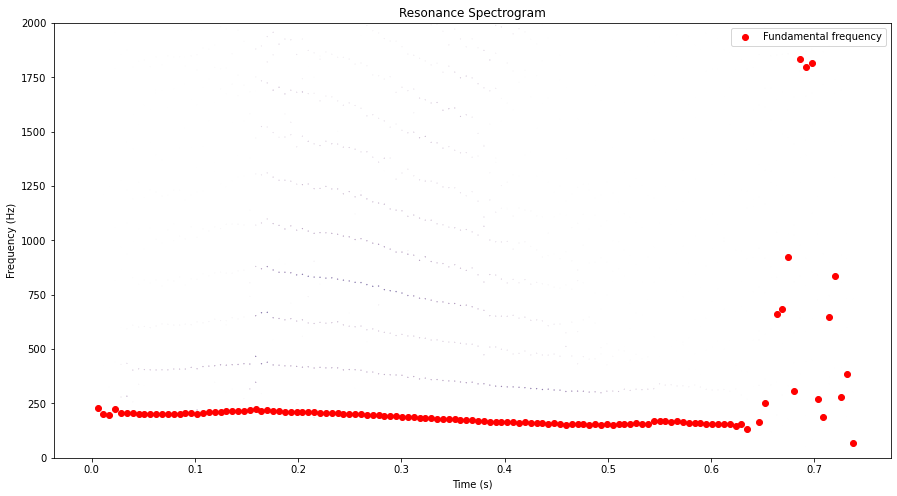

In [4]:
plot_f0(spectrogram, f0, max_freq = 2000)

## 4. Arrows plot

Function to plot the original spectrogram using symbols to represent positive (triangle), negative (inverted triangle) and 'constant' (circle) decays.

- Circle: - 5 < Decay < 5
- Triangle: Decay > 5
- Inverted triangle: Decay < - 5

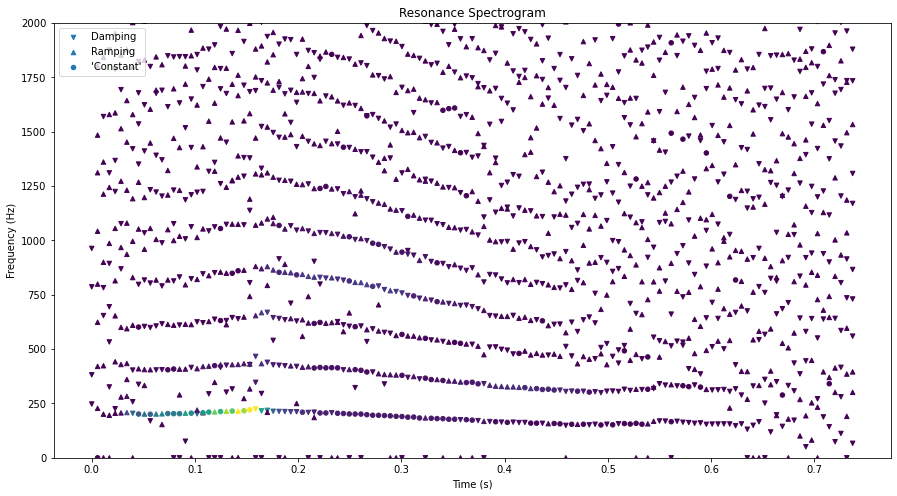

In [5]:
plot_spectrogram_arrows(spectrogram, min_freq = 0, max_freq = 2000)

## 5. Densities

Finally we show the use of the density functions to obtain the continuous and discrete density spectrograms.

The density is calculated using the next formula:
<br>
<br>
<center> $\large\sum_{n = 1}^{N} G(n) \cdot  \sum_{k = 1}^{K} \frac{\pi |d_{k}|^{2}}{\gamma_{k}} \cdot V (\eta - \phi{_k}; \gamma{_k}, \sigma ) $ </center>
<br>

Where:

- $ n $ indexes the contiguous slices (spectra) with center in the slice (spectrum) where we want to obtain the density.
- $ G(x) $ is the Gaussian window.
- $ k $ indexes the resonances of the corresponding slice (spectrum)
- $ d_{k}$ is the decay of the k resonance
- $ \gamma_{k}$ is the imaginary part of the complex frequency of the k resonance
- $ V(x; \sigma, \gamma) $ is the Voigt profile.
- $ \eta $ is the angular frequency of the evaluation point
- $ \phi_{k} $ is the angular frequency of the k resonance
- $ \sigma $ is the standard deviation of the Voigt profile (inner Gaussian window)

This density formula can be applied to obtain the density of any point in the spectrgram.

### 5.1 Continuous density spectrogram

The continuous density is calculated for each evenly spaced point in frequency (determined by the precision argument) for each window (slice) of the spectrogram.

In [6]:
cont_density = continuous_density_spectrogram(spectrogram, min_freq = 0, max_freq = 5000, slices_overlap = 7, 
                                              freq_overlap = 200, precision = 500)

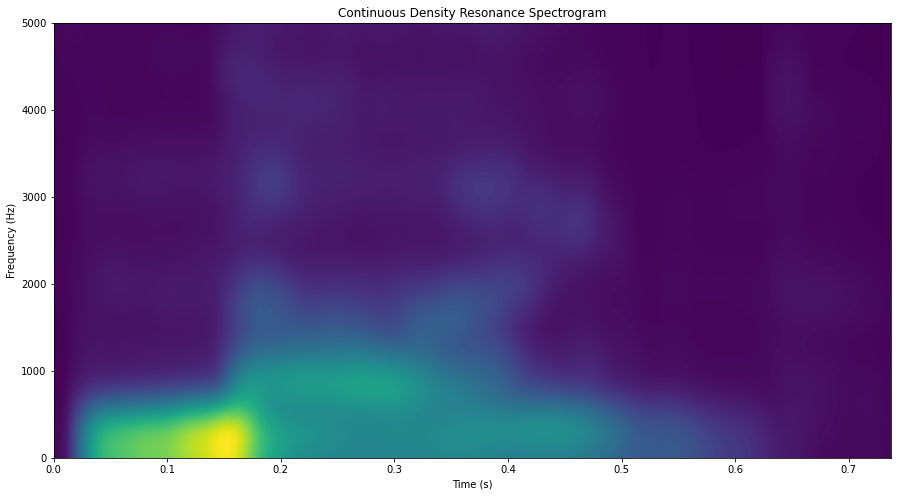

In [7]:
plot_continuous_density_spectrogram(cont_density, spectrogram, precision = 500, min_freq = 0, 
                                    max_freq = 5000, threshold = 0)

### 5.2 Discrete density spectrogram

The discrete density is calculated for each resonance of the spectrogram.

In [8]:
discrete_density = discrete_density_spectrogram(spectrogram, slices_overlap = 7, freq_overlap = 200)

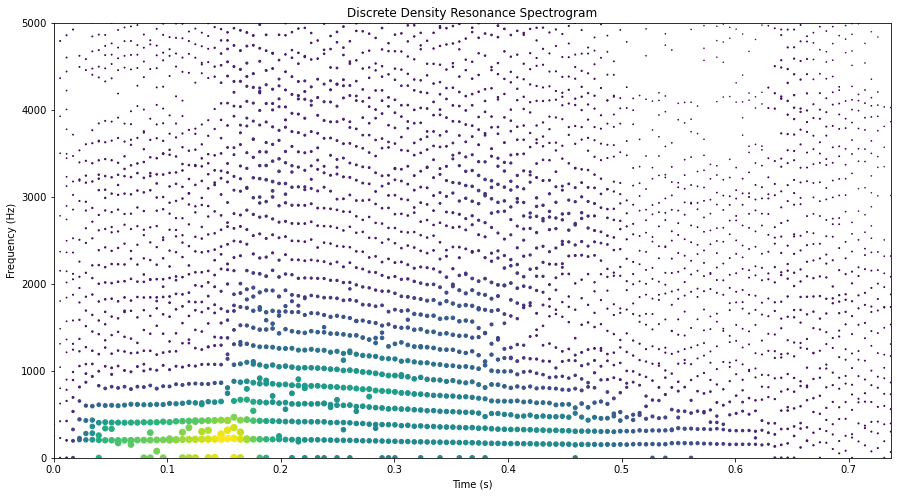

In [9]:
plot_discrete_density_spectrogram(discrete_density, spectrogram, max_freq = 5000, threshold = 0)